# Android Malware

Our dataset for this project is taken from https://www.mlsec.org/docs/2014-ndss.pdf which is a known dataset of android malware data.
This is a public dataset which we downloaded from https://figshare.com/articles/dataset/Android_malware_dataset_for_machine_learning_2/5854653/1

There are other similar datasets for android malware for example:
- https://github.com/DefenseDroid/DefenseDroid    
- https://www.unb.ca/cic/datasets/maldroid-2020.html 
    - file: feature_vectors_syscalls_frequency_5_Cat.csv 
    - This is a very comprehensive and clean data set. The problem with this dataset is that it is too clean to demonstrate preprocessing steps in our project.
- https://www.unb.ca/cic/datasets/andmal2020.html
    - This data set similar to the other Maldroid 2020 data set. However, in contrast it contains multiple csv files and we need to spend considerable effort
      to create a data set that can be used for our assignment.
Hence, the  Drebin dataset is chosen as made it easier to work with for our purpose and demonstrate the ML processes.

# Import Dependencies

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

# Exploratory Data Analysis

Let's analyze our dataset and hopefully gain some insights.

In [63]:
df=pd.read_csv("https://raw.githubusercontent.com/raymondsamalo/25S1-C-NYP-ITI111-Applied-Machine-Learning/refs/heads/main/drebin-215-dataset-5560malware-9476-benign.csv")
df.info() # read our data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


/var/folders/pq/ctzkfdzj3cg4894zy28yqknc0000gn/T/ipykernel_6512/1105618988.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("https://raw.githubusercontent.com/raymondsamalo/25S1-C-NYP-ITI111-Applied-Machine-Learning/refs/heads/main/drebin-215-dataset-5560malware-9476-benign.csv")



Pandas reported issue for columns 92
``` DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.```.

Let's take a deeper look on this column 92.


In [56]:
column_names_index = df.columns
print(column_names_index[92]) # output TelephonyManager.getSimCountryIso
print(df['TelephonyManager.getSimCountryIso'].unique()) # output array(['0', '1', '?', 1, 0], dtype=object)

TelephonyManager.getSimCountryIso
['0' '1' '?' 1 0]


We discovered that the column 92 or `TelephonyManager.getSimCountryIso` contains `['0' '1' '?' 1 0]`.

We need to handle unknown '?' data and also convert '0','1' to integer.

However, the df.info() shows us that we have two object columns. 
Let's check out the other object column to gain deeper insight to our data.

In [47]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Object columns: {object_columns}") # Object columns: ['TelephonyManager.getSimCountryIso', 'class']
print(f"{'Column':40}Values")
for i in object_columns:
    print(f"{i:40}{df[i].unique()}")

Object columns: ['TelephonyManager.getSimCountryIso', 'class']
Column                                  Values
TelephonyManager.getSimCountryIso       ['0' '1' '?' 1 0]
class                                   ['S' 'B']


We discover that beside 'TelephonyManager.getSimCountryIso', the other object or string column is 'class'.
For 'class' column, the values are ['S' 'B']. 
We do not need to handle missing value for 'class' column but we do need to convert 'S' to suspicious malware and 'B' to benign.
We shall do this by converting the value to integer 1 for Malware and 0 for benign in a new column.

Alright, given we know the two columns that we need to handle, let's preprocess them.

In [ ]:
column_name='TelephonyManager.getSimCountryIso'
df[column_name] = pd.to_numeric(df[column_name], errors='coerce') 
if 'class' in df:
    df['malware']=(df['class']=='S').astype(int)
    df.drop('class',axis=1,inplace=True)
print(df[column_name].unique())
df.columns[df.isna().any()].tolist() # return ['TelephonyManager.getSimCountryIso'] as the only columen with nan value
# lets check corellation of this column TelephonyManager.getSimCountryIso with our malware


[ 0.  1. nan]


['TelephonyManager.getSimCountryIso']

To simplify the problem, given we know that only 1 column has Nan value  from the above code output, let's check the correlation between
'malware' column which is our target with 'TelephonyManager.getSimCountryIso' feature column. We shall use both correlation matrix and pairplot.

np.float64(-0.11411289889202261)

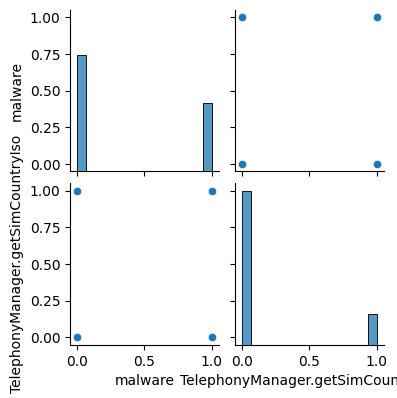

In [85]:
attributes=['malware','TelephonyManager.getSimCountryIso']
df2=df[attributes]
_=sns.pairplot(df2, height=2)
corr_matrix=df.corr(numeric_only=True)
corr_matrix['malware']['TelephonyManager.getSimCountryIso']

We found that the correlation of 'TelephonyManager.getSimCountryIso' to malware is relatively low as it is only -0.11.
Let's drop it from our features list to simplify our dataset. This is expected as getting the country of the phone Sim Card is likely common for benign android app.

In [87]:
column_name='TelephonyManager.getSimCountryIso'
if column_name in df:
    df.drop(column_name,axis=1,inplace=True)